In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
#from vnpy.trader.app.ctaStrategy.strategy.strategyMultiTimeframe import MultiTimeframeStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyMultiSignal import MultiSignalStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20130101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象
#ngine.initStrategy(MultiTimeframeStrategy, d)    
#engine.initStrategy(MultiSignalStrategy, {})    

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2018-02-19 12:00:07.698000	开始载入数据
2018-02-19 12:00:08.873000	载入完成，数据量：285480
2018-02-19 12:00:08.873000	开始回测
2018-02-19 12:00:09.035000	策略初始化完成
2018-02-19 12:00:09.035000	策略启动完成
2018-02-19 12:00:09.035000	开始回放数据
2018-02-19 12:01:40.422000	数据回放结束


2018-02-19 12:01:40.523000	计算按日统计结果
2018-02-19 12:01:40.688000	------------------------------
2018-02-19 12:01:40.688000	首个交易日：	2013-01-11
2018-02-19 12:01:40.689000	最后交易日：	2017-07-14
2018-02-19 12:01:40.689000	总交易日：	1095
2018-02-19 12:01:40.689000	盈利交易日	541
2018-02-19 12:01:40.689000	亏损交易日：	554
2018-02-19 12:01:40.689000	起始资金：	1000000
2018-02-19 12:01:40.689000	结束资金：	1,696,649.0
2018-02-19 12:01:40.689000	总收益率：	69.66%
2018-02-19 12:01:40.689000	年化收益：	15.27%
2018-02-19 12:01:40.689000	总盈亏：	696,649.0
2018-02-19 12:01:40.689000	最大回撤: 	-185,949.45
2018-02-19 12:01:40.689000	百分比最大回撤: -10.7%
2018-02-19 12:01:40.689000	总手续费：	201,671.0
2018-02-19 12:01:40.689000	总滑点：	406,020.0
2018-02-19 12:01:40.689000	总成交金额：	6,722,366,580.0
2018-02-19 12:01:40.689000	总成交笔数：	6,767.0
2018-02-19 12:01:40.689000	日均盈亏：	636.21
2018-02-19 12:01:40.689000	日均手续费：	184.17
2018-02-19 12:01:40.689000	日均滑点：	370.79
2018-02-19 12:01:40.689000	日均成交金额：	6,139,147.56
2018-02-19 12:01:40.689000	日均成交笔数：	6.18
2018-02-19 12:01:40.

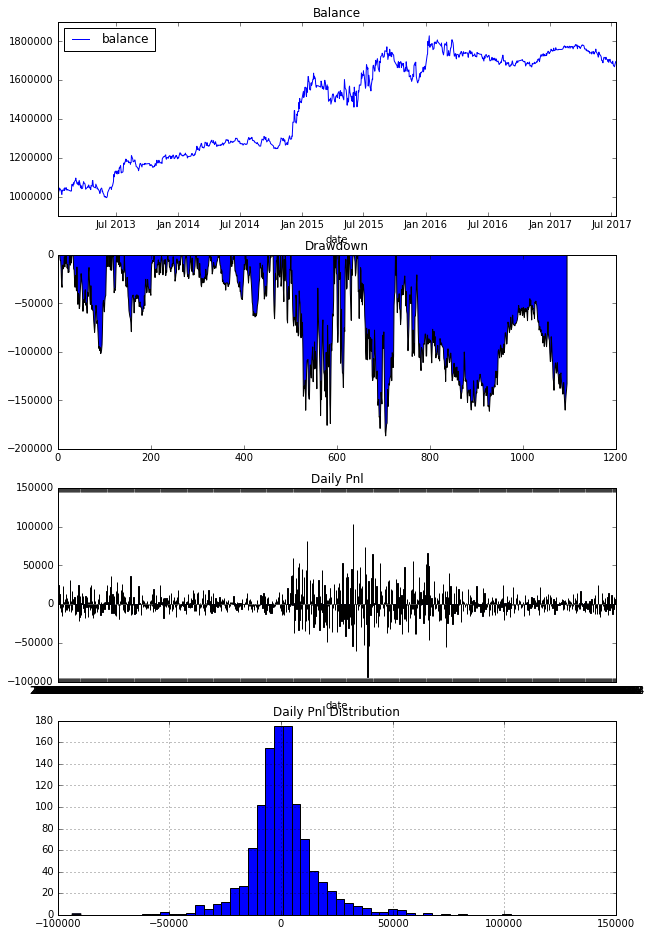

In [7]:
# 显示逐日回测结果
engine.showDailyResult()

2018-02-19 12:03:01.082000	计算回测结果
2018-02-19 12:03:01.244000	------------------------------
2018-02-19 12:03:01.244000	第一笔交易：	2013-01-11 10:16:00
2018-02-19 12:03:01.244000	最后一笔交易：	2017-07-14 15:00:00
2018-02-19 12:03:01.244000	总交易次数：	3,384.0
2018-02-19 12:03:01.244000	总盈亏：	696,555.71
2018-02-19 12:03:01.244000	最大回撤: 	-215,542.46
2018-02-19 12:03:01.245000	平均每笔盈利：	205.84
2018-02-19 12:03:01.245000	平均每笔滑点：	120.0
2018-02-19 12:03:01.245000	平均每笔佣金：	59.61
2018-02-19 12:03:01.245000	胜率		37.41%
2018-02-19 12:03:01.245000	盈利交易平均值	8,811.29
2018-02-19 12:03:01.245000	亏损交易平均值	-4,937.93
2018-02-19 12:03:01.245000	盈亏比：	1.78


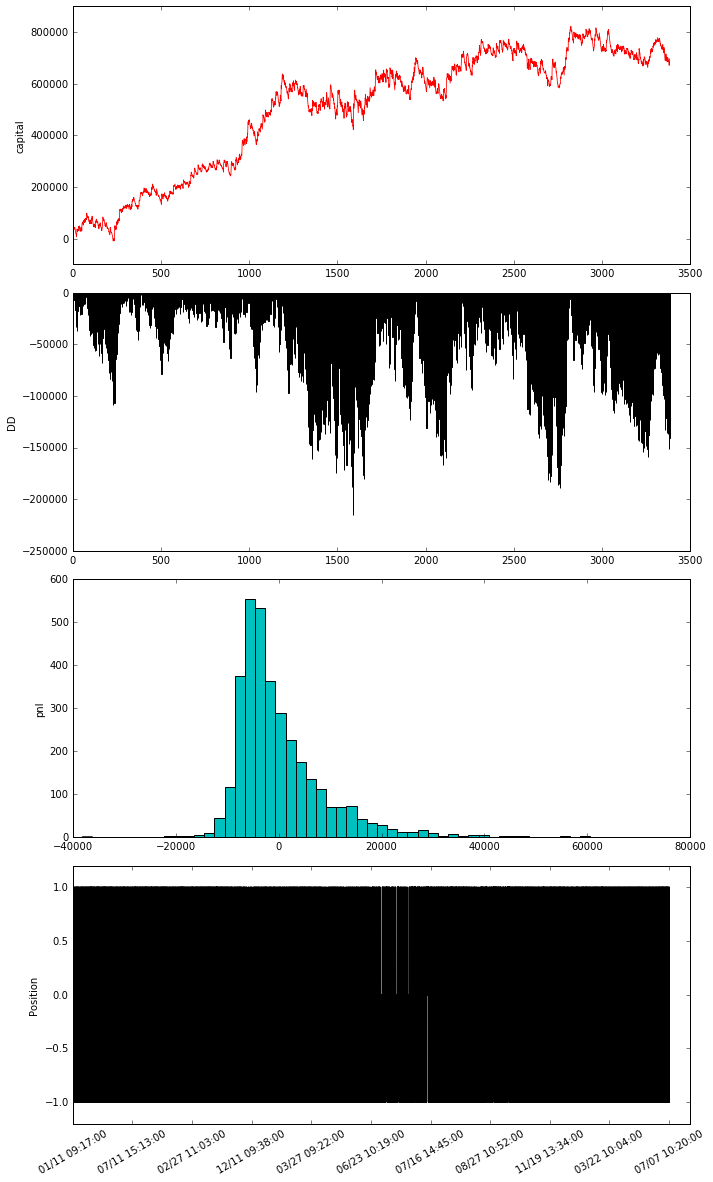

In [9]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [10]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])

TradeID: 1, Time: 2013-01-11 09:17:00, Direction: 多, Price: 2542.0, Volume: 1
TradeID: 2, Time: 2013-01-11 10:16:00, Direction: 空, Price: 2527.0, Volume: 1
TradeID: 3, Time: 2013-01-11 10:17:00, Direction: 空, Price: 2529.0, Volume: 1
TradeID: 4, Time: 2013-01-14 10:36:00, Direction: 多, Price: 2501.6, Volume: 1
TradeID: 5, Time: 2013-01-14 10:37:00, Direction: 多, Price: 2501.8, Volume: 1
TradeID: 6, Time: 2013-01-16 10:00:00, Direction: 空, Price: 2587.6, Volume: 1
TradeID: 7, Time: 2013-01-16 10:01:00, Direction: 空, Price: 2586.4, Volume: 1
TradeID: 8, Time: 2013-01-16 13:45:00, Direction: 多, Price: 2549.6, Volume: 1
TradeID: 9, Time: 2013-01-16 13:46:00, Direction: 多, Price: 2554.8, Volume: 1
TradeID: 10, Time: 2013-01-17 09:43:00, Direction: 空, Price: 2571.8, Volume: 1


In [17]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('endBalance')        # 设置优化排序的目标是策略净盈利sharpeRatio totalNetPnl endBalance
setting.addParameter('atrLength', 12, 16, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
#setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
#setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
start = time.time()
resultList = engine.runParallelOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

2018-02-19 12:52:56.800000	------------------------------
2018-02-19 12:52:56.800000	优化结果：
2018-02-19 12:52:56.801000	参数：{'atrLength': 16}，目标：1764953.2408
2018-02-19 12:52:56.801000	参数：{'atrLength': 12}，目标：1727497.678
2018-02-19 12:52:56.801000	参数：{'atrLength': 14}，目标：1714414.4122
耗时：57.1710000038


In [15]:
# 显示优化的所有统计数据
for result in resultList:
    print '-' * 30
    print u'参数：%s，目标：%s' %(result[0], result[1])
    print u'统计数据：'
    for k, v in result[2].items():
        print u'%s：%s' %(k, v)

------------------------------
参数：{'atrLength': 16}，目标：764953.2408
统计数据：
startDate：2013-01-11
endBalance：1764953.2408
endDate：2017-07-14
dailyTurnover：6081788.71233
annualizedReturn：16.7660984285
returnStd：1.02855331287
totalTradeCount：6711
maxDrawdown：-212996.1012
totalTurnover：6659558640.0
profitDays：545
sharpeRatio：0.775544272746
maxDdPercent：-10.9188399076
dailyReturn：0.0514905797226
totalSlippage：402660.0
dailyNetPnl：698.587434521
dailyTradeCount：6.12876712329
totalNetPnl：764953.2408
totalDays：1095
lossDays：550
dailySlippage：367.726027397
dailyCommission：182.45366137
totalReturn：76.49532408
totalCommission：199786.7592
------------------------------
参数：{'atrLength': 12}，目标：727497.678
统计数据：
startDate：2013-01-11
endBalance：1727497.678
endDate：2017-07-14
dailyTurnover：6126098.08219
annualizedReturn：15.9451545863
returnStd：1.02075215257
totalTradeCount：6753
maxDrawdown：-169875.915
totalTurnover：6708077400.0
profitDays：546
sharpeRatio：0.751740804186
maxDdPercent：-9.71535142172
dailyRetu